<a href="https://colab.research.google.com/github/lurndatascience/DeepLearning/blob/main/MultiLayerANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

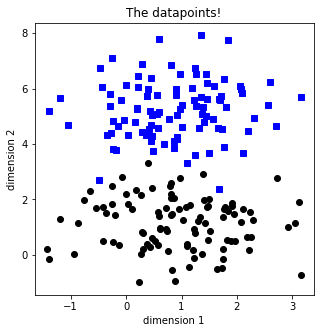

In [13]:
per_cluster = 100
blur = 1

A = [ 1 , 5 ]
B = [ 1 , 1 ]

# Generate Data
a = [ A[0] + np.random.randn(per_cluster) * blur ,  A[1] + np.random.randn(per_cluster) * blur  ]
b = [ B[0] + np.random.randn(per_cluster) * blur ,  B[1] + np.random.randn(per_cluster) * blur  ]


# True Labels
labels_np = np.vstack ( (  np.zeros( (per_cluster, 1) ),  np.ones( (per_cluster, 1) )  ) )

data_np = np.hstack(( a, b) ).T

labels = torch.tensor(labels_np).float()
data = torch.tensor(data_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The datapoints!')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.show()

In [14]:
def createANNmodel(learningRate):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,16),  # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(16,1),  # hidden layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
      nn.Sigmoid(),     # final activation unit
        )

  # loss function
  lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  # model output
  return ANNclassify,lossfun,optimizer

In [15]:
# a function that trains the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):

  # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNmodel(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  
  
  # final forward pass
  predictions = ANNmodel(data)
    
  # compute the predictions and report accuracy
  # NOTE: Wasn't this ">0" previously?!?!
  totalacc = 100*torch.mean(((predictions>.5) == labels).float())
  
  return losses,predictions,totalacc

Final accuracy: 96.5%


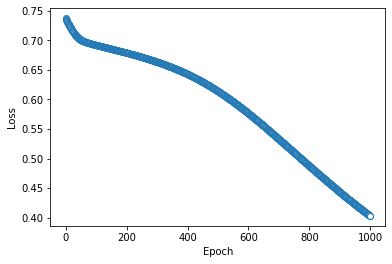

In [16]:
# Test the new code by running it once

# create everything
ANNclassify,lossfun,optimizer = createANNmodel(.01)

# run it
losses,predictions,totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()



In [17]:
# learning rates
learningrates = np.linspace(.001,.1,50)

# initialize
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))


# the loop
for i,lr in enumerate(learningrates):
  
  # create and run the model
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  # store the results
  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()


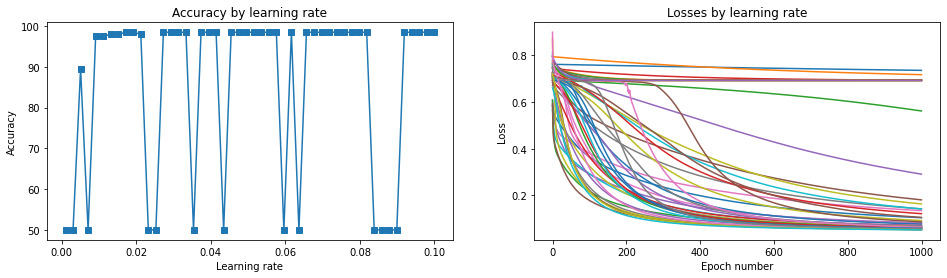

In [18]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [19]:
accByLR

[tensor(50.),
 tensor(50.),
 tensor(89.5000),
 tensor(50.),
 tensor(97.5000),
 tensor(97.5000),
 tensor(98.),
 tensor(98.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.),
 tensor(50.),
 tensor(50.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(50.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(50.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(50.),
 tensor(98.5000),
 tensor(50.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(50.),
 tensor(50.),
 tensor(50.),
 tensor(50.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000)]

In [21]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.7400)